# Clustering

In [14]:
#TODO: remove after development 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
%matplotlib inline

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd

pd.set_option('display.max_columns', 5400)
pd.set_option('max_colwidth', 50)

## Loading data

In [17]:
#seed_name = 'hair_dryer'
#seed_name = 'video_codec'
#seed_name = 'diesel'
#seed_name = "contact_lens"
#seed_name = "contact_lens_us_c"
seed_name = "3d_printer"

src_dir = "."

In [18]:
import pickle

with open(src_dir + "/data/" + seed_name + "/semantic/tsne.pkl", 'rb') as infile:
    df = pickle.load(infile)   
print(df.shape)
df.head()

(1041, 24)


,pub_num,publication_number,country_code,family_id,priority_date,title_text,abstract_text,claims_text,tokens,year,month,day,ipc_classes,first_letters,three_letters,four_letters,before_slash,references,referenced_by,raw_assignees,assignees,terms,x,y
0,101815513,KR-101815513-B1,KR,61070315,20160711,Polymer Cement Concrete 3D Printer And Concret...,The present invention relates to a polymer cem...,None,"[polymer, cement, concrete, _NUMBER_d, printer...",2016,7,11,"[B29C31/10, B29C67/00, B29C67/24, B29K103/04, ...",[B],"[B29, B33]","[B29C, B29K, B33Y]","[B29C31, B29C67, B33Y70]","[KR-101479900-B1, JP-2005035299-A, CN-10561980...",[],"[CONUS CO LTD, UNIV OF SEOUL INDUSTRY COOPERAT...","[CONUS CO LTD, UNIV OF SEOUL INDUSTRY COOPERAT...","[concrete, pipe, cement, transfer, curing, inj...",9.327729,-6.625592
1,2006337146,AU-2006337146-B9,AU,56290804,20060203,High elongation vacuum formable digital ink,The present invention includes a curable ink c...,None,"[high, elongation, vacuum, formable, digital, ...",2006,2,3,"[B29C35/08, B29C67/00, B41J2/01, B41M5/00, C08...","[B, C]","[B29, B41, C08]","[B29C, B41J, B41M, C08F]","[B29C35, B29C67, B41J2, B41M5, C08F2]","[US-2003202082-A1, US-6550905-B1]",[],[SLOAN DONALD],[SLOAN DONALD],"[mono functional, ink composition, mono, ink, ...",-51.826618,-27.242540
2,2006337146,AU-2006337146-B2,AU,56290804,20060203,High elongation vacuum formable digital ink,The present invention includes a curable ink c...,None,"[high, elongation, vacuum, formable, digital, ...",2006,2,3,"[B29C35/08, B29C67/00, B41J2/01, B41M5/00, C08...","[B, C]","[B29, B41, C08]","[B29C, B41J, B41M, C08F]","[B29C35, B29C67, B41J2, B41M5, C08F2]","[US-6550905-B1, US-2003202082-A1]",[],[SLOAN DONALD],[SLOAN DONALD],"[mono functional, ink composition, mono, ink, ...",-52.098080,-26.878370
3,2015759,NL-2015759-B1,NL,56084291,20151110,Additive manufacturing of metal objects.,The present invention relates to a radiation-c...,None,"[additive, manufacturing, metal, objects, radi...",2015,11,10,"[B22F1/00, B22F3/00, B22F3/10]",[B],[B22],[B22F],"[B22F1, B22F3]","[WO-2014118783-A1, US-2002176793-A1, CN-104148...",[],[STICHTING ENERGIEONDERZOEK CENTRUM NEDERLAND],[STICHTING ENERGIEONDERZOEK CENTRUM NEDERLAND],"[precursor, slurry, green, body, obtain, parti...",-22.953943,-24.568386
4,20180061677,KR-20180061677-A,KR,62599998,20161130,Manufacturing Method of Filament for 3D Print ...,The present invention relates to a manufacturi...,None,"[manufacturing, filament, _NUMBER_d, print, fi...",2016,11,30,"[B29B11/10, B29B11/14, B29C67/00, B29K55/02, B...",[B],"[B29, B33]","[B29B, B29C, B29K, B33Y]","[B29B11, B29C67, B29K55, B33Y70]","[JP-2007246845-A, KR-20160063877-A, KR-2016012...",[],[EER&C CO LTD],[EER&C CO LTD],"[filament, molded, mixture, post processing, _...",-13.453877,-28.624912


### Hierarchical clustering

In [19]:
%%time

import scipy.cluster.hierarchy as shc

clustering_features = df[["x", "y"]]
linkage = shc.linkage(clustering_features, method='average', metric='euclidean')

Wall time: 22.9 ms


Based on this linkage we can plot the dendogram.<br>

The parameter `max_d` gives you the possibility to decide at which `x` value you want to split.

In [20]:
max_d = {}
#max_d["hair_dryer"] = {"big": 10, "medium": 3.5, "small": 1} avg incorrect
max_d["hair_dryer"] = {"big": 10, "medium": 6, "small": 3}
max_d["video_codec"] = {"big": 45, "medium": 18, "small": 9.7}
max_d["diesel"] = {"big": 45, "medium": 20, "small": 15}
max_d["contact_lens"] = {"big": 49.5, "medium": 23, "small": 12}
max_d["contact_lens_us_c"] = {"big": 46, "medium": 23, "small": 13} #avg correct weighed
#max_d["contact_lens_us_c"] = {"big": 40, "medium": 24, "small": 13} avg correct
#max_d["contact_lens"] = {"big": 40, "medium": 20, "small": 10}  all countries
max_d["3d_printer"] = {"big": 35, "medium": 17, "small": 9}

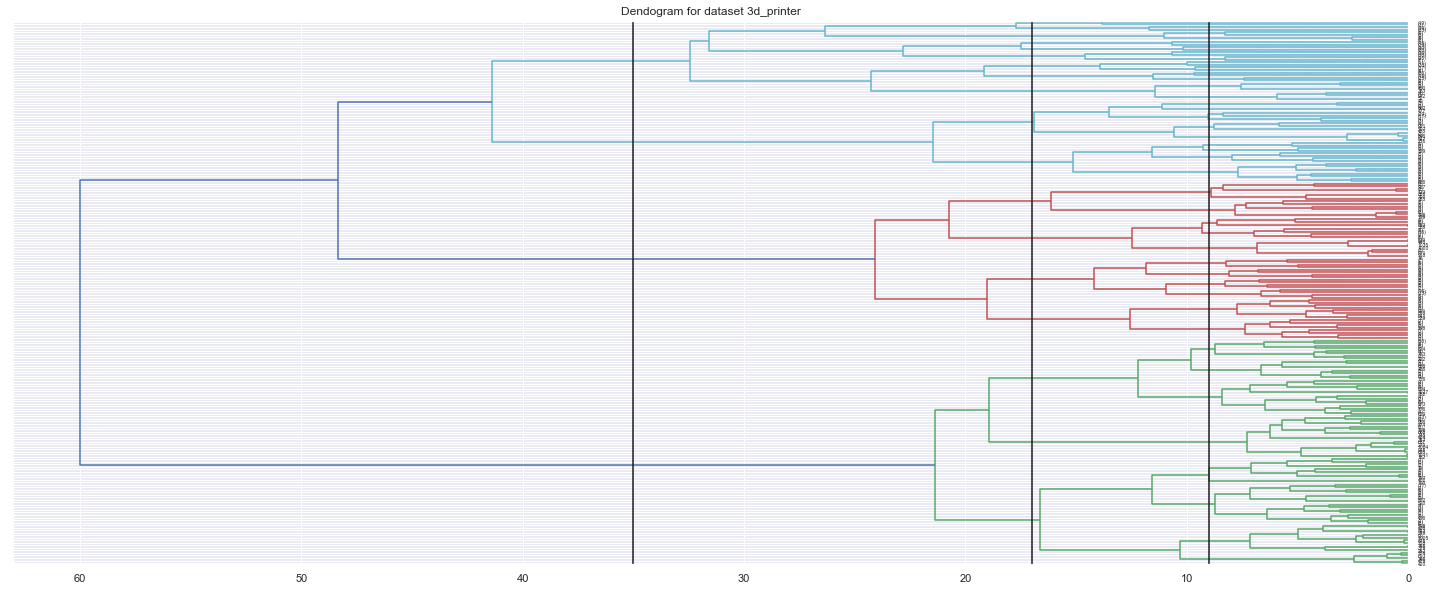

In [21]:
plt.figure(figsize=(25, 10))  
plt.title("Dendogram for dataset " + seed_name)

dend = shc.dendrogram(linkage, p=7, truncate_mode='level', orientation='left', show_leaf_counts=True, show_contracted=True)

for k, v in max_d[seed_name].items():
    plt.axvline(x=v, c='k')

In [22]:
from nltk.stem.snowball import SnowballStemmer
from fiz_lernmodule.word2vec import Word2VecReader

def get_similar_words(word2vec_model, stemmer, labels):
    augmented = {}
    
    for label in labels:
        if len(label.split(" ")) == 1: # word2vec model cannot work with n-grams
            augmented[label] = []
            similar = word2vec_model.find_similar(label, 10)        
            stemmed_label = stemmer.stem(label)
            for s in similar:
                word = s['word']
                stemmed_word = stemmer.stem(word)
                if stemmed_word != stemmed_label:
                    augmented[label].append(word)
        
    return augmented

stemmer = SnowballStemmer("english")

w2v_loader = Word2VecReader(src_dir=src_dir)
w2v_model = w2v_loader.load_word_embeddings()

Load mappings from .\5.9m\vocab\vocab.csv
Load config from .\5.9m\vocab\config.csv
INFO:tensorflow:Restoring parameters from .\5.9m\checkpoints\5.9m_abstracts.ckpt-1325000


In [23]:
def filter_similar_by_occurence(tokens, augmented):
    filtered = {}
    for k, v in augmented.items():
        filtered[k] = []
        for word in v:
            contains = tokens.map(lambda x: word in x)
            num_contains = contains.values.sum() 
            if num_contains > len(tokens) / 10:
                if word not in augmented.keys():
                    filtered[k].append(word)
    return filtered

In [24]:
from collections import Counter

def collect_counts(col):
    counter = Counter()
    tokens = [item for sublist in col.values for item in sublist]
    for token in tokens:
        counter[token] +=1        
    return counter

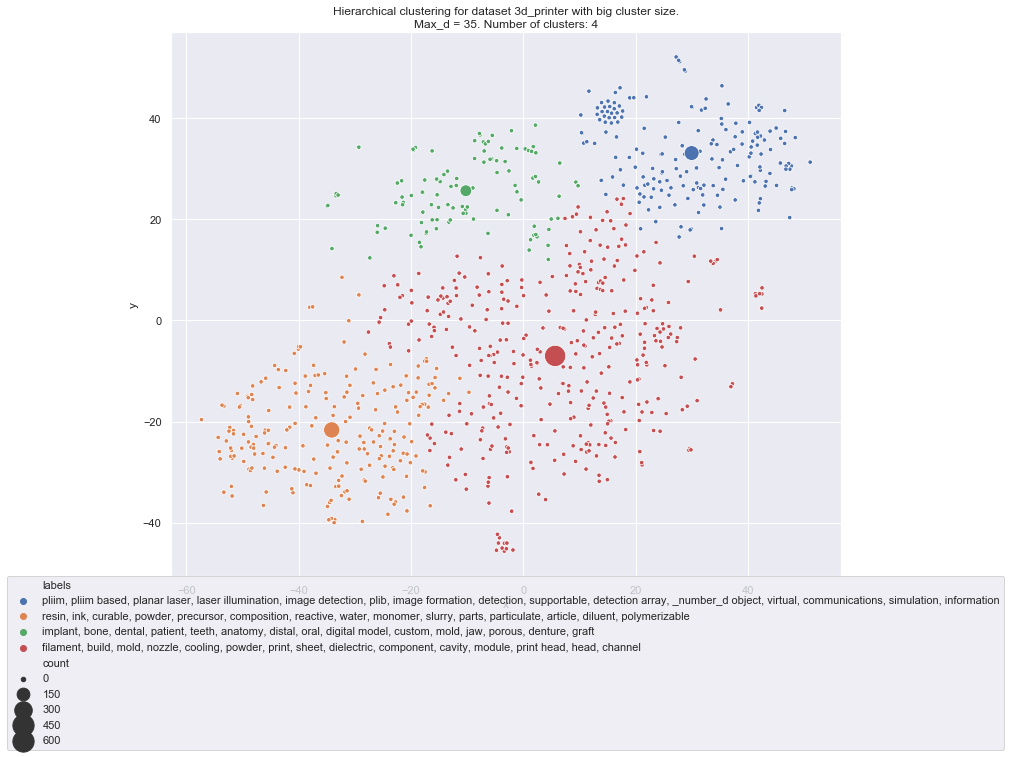

KeyboardInterrupt: 

In [25]:
%%time
from scipy.cluster.hierarchy import fcluster
from scipy import stats

number_of_key_terms = 15
count_first_n_terms = 10
augment_first_n_terms = 3

total_cluster_centers = pd.DataFrame(columns = ['id', "x", "y", "min_x", "min_y", 'max_x', 'max_y', 'count', 'labels', 'augmented_labels', 'level', 'ids'])

for cluster_size in ["big", "medium", "small"]:

    fcluster_pred = fcluster(linkage, max_d[seed_name][cluster_size], criterion='distance')    
    cluster_indexes = pd.unique(fcluster_pred)

    plot_data = pd.DataFrame(columns = ['x', "y", "labels", "count"])
    
    cluster_centers = pd.DataFrame(columns = total_cluster_centers.columns)

    for i in range(len(cluster_indexes)):
        cluster = df[fcluster_pred == i + 1]
        
        cooccurent = collect_counts(cluster["terms"].apply(lambda x: x[:count_first_n_terms]))        
        labels = [i[0] for i in cooccurent.most_common(number_of_key_terms)]
        
        similar_words = get_similar_words(w2v_model, stemmer, labels[:augment_first_n_terms])               
        augmented = filter_similar_by_occurence(cluster["tokens"], similar_words)
               
        ids = pd.unique(cluster.publication_number)
        
        count = len(ids)

        without_outliers = cluster[["x", "y"]]
        #without_outliers = without_outliers[(np.abs(stats.zscore(without_outliers)) < 3).all(axis=1)]
           
        min_x = np.min(without_outliers.x)
        min_y = np.min(without_outliers.y)
        max_x = np.max(without_outliers.x)
        max_y = np.max(without_outliers.y)
        
        x = np.mean(without_outliers.x)
        y = np.mean(without_outliers.y)

        d = {"id": [i], "x": [x], "y": [y], "min_x": [min_x], "min_y": [min_y], "max_x": [max_x], "max_y": [max_y], "count": [count], 
                 'labels': [", ".join(labels)], 'level': cluster_size, 'ids': [ids], 'augmented_labels': [augmented]}    
        cluster_centers = cluster_centers.append(pd.DataFrame(data=d), sort=False)
                
        plot_d = {"x": cluster.x, "y": cluster.y, "count": [1]*cluster.shape[0]}         
        cluster_plot_data = pd.DataFrame(data = plot_d)        
        cluster_plot_data["labels"] = ", ".join(labels)
        
        plot_data = plot_data.append(cluster_plot_data, sort=False)
        
    #cluster_centers.reset_index(inplace=True, drop=True)
    
    plot_data_with_centroids = plot_data.append(cluster_centers, sort=False)
    plot_data_with_centroids['count'] = pd.to_numeric(plot_data_with_centroids["count"])
       
    fig, ax = plt.subplots(figsize=(12,10))
    ax = sns.scatterplot(x="x", y="y", data=plot_data_with_centroids, hue="labels", size="count", sizes=(20, np.max(cluster_centers["count"])))
    plt.title("Hierarchical clustering for dataset " + seed_name + " with " + cluster_size + " cluster size.\nMax_d = " 
              + str(max_d[seed_name][cluster_size]) + ". Number of clusters: " + str(len(cluster_indexes)))
    plt.legend(bbox_to_anchor=(0.5, -len(cluster_indexes)*0.03 - 0.2), loc=8, borderaxespad=0.)
    plt.show()
    
    cluster_centers["labels"] = cluster_centers['labels'].map(lambda x: x.split(", "))
    #cluster_centers.index.rename("id", inplace=True)
    #cluster_centers.reset_index(inplace=True)
    
    total_cluster_centers = total_cluster_centers.append(cluster_centers,sort=False)
    
    total_cluster_centers.to_json(src_dir + "/../demo/data/semantic/" + seed_name + "_clusters.json", orient="records", index=True) #write intermediate results to prevent long wait

In [13]:
print(total_cluster_centers.head())
total_cluster_centers.tail()

  id          x          y      min_x      min_y      max_x      max_y count  \
0  0  29.955438  33.094958  10.223787  16.499680  51.051338  52.098511   210   
0  1 -34.119668 -21.669218 -57.309113 -40.003132  -9.691506   8.511910   256   
0  2 -10.237533  25.642856 -34.932617  12.047923   9.734171  38.635365   124   
0  3   5.652701  -7.026441 -27.578268 -45.638790  42.478062  24.096790   451   
0  0  39.581475  35.298464  27.194288  20.328535  51.051338  52.098511    93   

                                              labels  \
0  [pliim, pliim based, planar laser, laser illum...   
0  [resin, ink, curable, powder, precursor, compo...   
0  [implant, bone, dental, patient, teeth, anatom...   
0  [filament, build, mold, nozzle, cooling, powde...   
0  [communications, design, virtual, network, use...   

                                    augmented_labels   level  \
0  {'pliim': ['plia', 'plib', 'ifd', 'plim', 'fov...     big   
0  {'resin': ['curing', 'cured', 'molding'], 'ink...  

,id,x,y,min_x,min_y,max_x,max_y,count,labels,augmented_labels,level,ids
0,48,3.636273,-25.083642,1.339461,-30.385832,7.243818,-19.620396,13,"[panel, body, pieces, mold, _number_d model, w...","{'panel': ['display', 'fold', 'edge'], 'body':...",small,"[EP-3222513-A1, EP-3216690-A1, US-9296129-B2, ..."
0,49,13.877847,-26.437331,8.858975,-31.823748,21.118832,-22.235252,26,"[filament, composite filament, platen, reinfor...","{'filament': [], 'platen': ['printer', 'printi...",small,"[GB-2520576-A, GB-2515348-A, GB-2510498-A, US-..."
0,50,37.035201,-12.918301,36.942692,-13.111939,37.220196,-12.531034,3,"[flange, cup, implants, implant, bone, outward...","{'flange': ['outwardly'], 'cup': [], 'implants...",small,"[GB-2541833-A, US-2017143495-A1, WO-2015187038..."
0,51,29.621353,-25.540915,29.462822,-25.694033,29.829762,-25.327976,3,"[middle, case, data set, cavity, hole, reduced...","{'middle': [], 'case': ['inside']}",small,"[CN-102699332-A, EP-2485099-A3, EP-2485099-A2]"
0,52,24.471813,-18.026510,20.521969,-21.922398,30.946936,-15.474934,16,"[front, hole, mounting, dental, tooth, teeth, ...","{'front': ['rear', 'back', 'side', 'end', 'fac...",small,"[EP-3045739-A1, US-9856629-B1, US-2016235504-A..."
